# Problem Statement - 
* You have two dataset.
* A training dataset that contains the features along with price range of mobiles.
* And a testing dataset that contains only the features of the mobiles.
# You have to build a Classification model using KNeighbor Classification algorithm that can predict in which range does the mobile price belongs to.
* You may also use other classification algorithms for complementary purpose.

# Importing the libraries

In [1]:
# For mathematical operations
import numpy as np

# For data manipulation
import pandas as pd

# For data visualisation
import matplotlib.pyplot as plt

# For data visualisation
import seaborn as sns

# For data cleaning
import re

# For loading the KNeighbor Classification algorithm
from sklearn.neighbors import KNeighborsClassifier

# For loading the Logistic regression algorithm
from sklearn.linear_model import LogisticRegression

# For loading the Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier

# For loading the Support Vector Classification algorithm
from sklearn.svm import SVC

# For loading the Random Forest classifier and Extra Tree classifier algorithm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix 

# For splitting the data and cross validation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score

# Importing the dataset:

training dataset link : https://drive.google.com/file/d/1DAbdRSkVCyJ0lmIduCVgPWxTlEz6lDmL/view?usp=sharing

testing dataset link :  https://drive.google.com/file/d/1ygyFxALd5we2ggOLDW94c0hajksiHUc4/view?usp=sharing

In [2]:
train_df = pd.read_csv("/content/drive/MyDrive/ayush/Devtown/Project- 10 Mobile Price Classification dataset/mobile_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/ayush/Devtown/Project- 10 Mobile Price Classification dataset/mobile_test.csv")

# EDA - Exploratory Data Analysis

In [3]:
# First five rows of training dataframe
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Last five rows of training dataframe
train_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
# First five rows of testing dataframe
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [6]:
# Last five rows of testing dataframe
test_df.tail()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0
999,1000,1270,1,0.5,0,4,1,35,0.1,140,...,19,457,608,2828,9,2,3,1,0,1


In [7]:
# Shape of training dataframe
train_df.shape

(2000, 21)

In [8]:
# Shape of testing dataframe
test_df.shape

(1000, 21)

In [9]:
# General information of the training dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
# Sum of null values in each column of training dataframe
train_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
# Sum of null values in whole training dataframe
train_df.isna().sum().sum()

0

In [12]:
# Statistical information of the training dataframe
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# Observations:

1. Training Data Strength: 2000
2. Testing Data Strength: 1000
2. No. of random variables in Training Data: 21
3. Non of the columns contain Null values: 21
4. Columns - All the columns were having numerical value.
6. Their is no need to clean the dataset it is already clean.

In [13]:
# Finding the correlation of columns with each other
train_df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

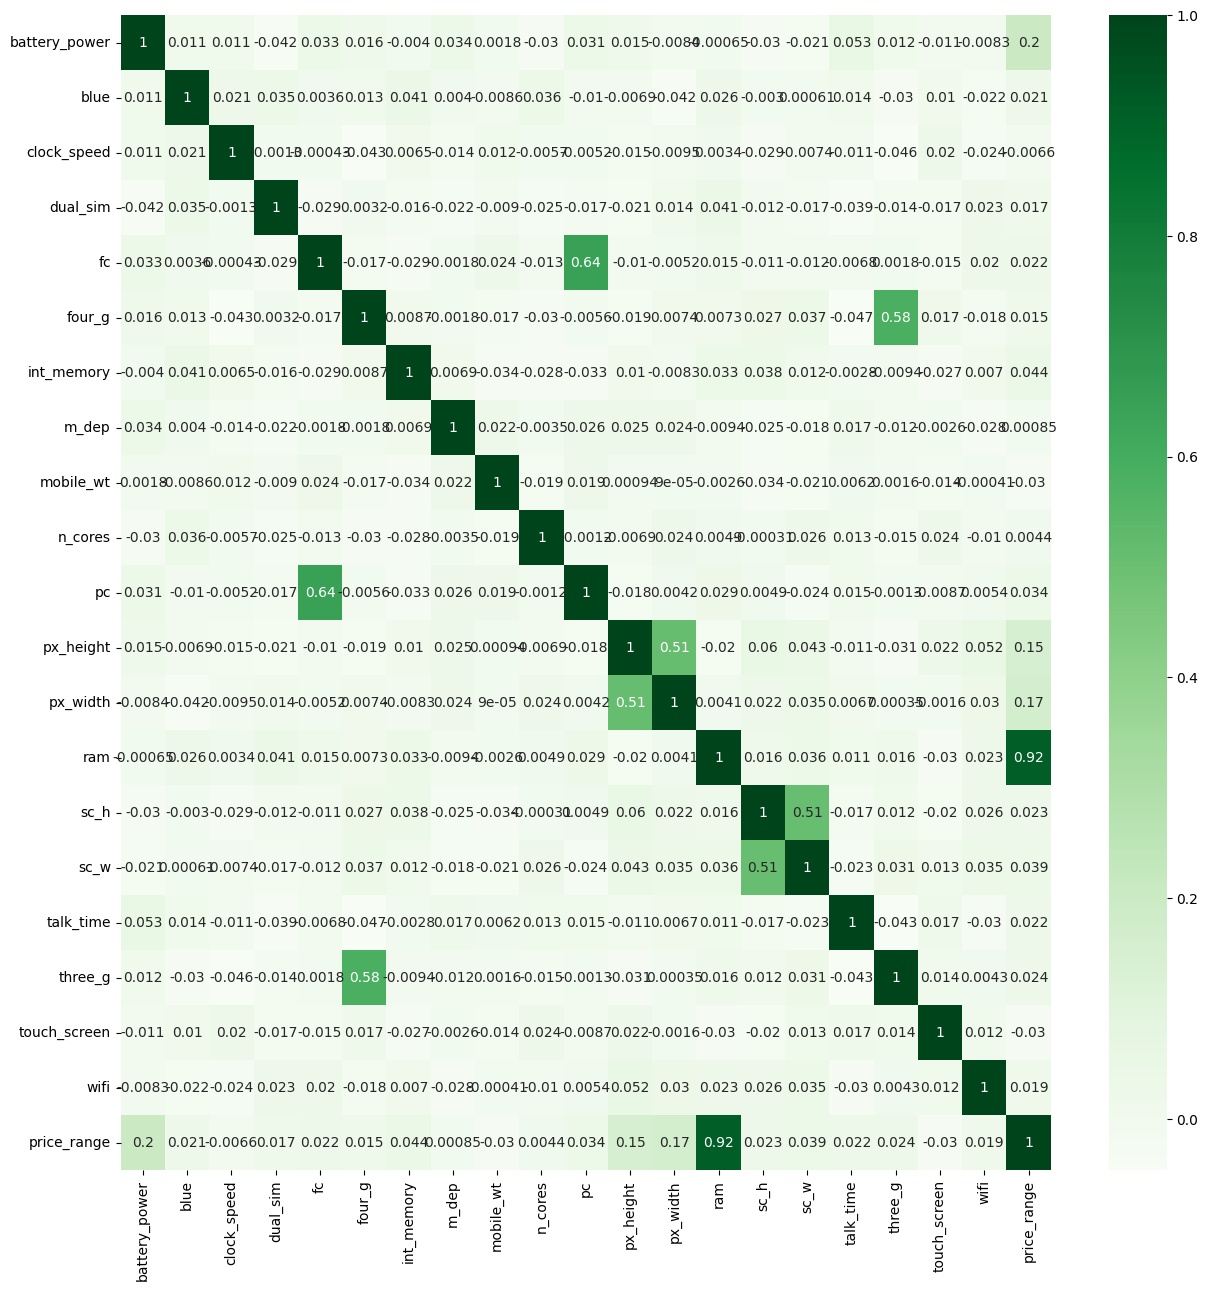

In [14]:
# Plotting the correlation using the heatmap
plt.figure(figsize = (15, 15))
sns.heatmap(train_df.corr(), annot = True, cmap = 'Greens')

# Feature Selection

In [15]:
X = train_df.drop("price_range", axis = 1)
y = train_df.price_range

In [16]:
model = ExtraTreesClassifier()

In [17]:
model.fit(X, y)

ExtraTreesClassifier()

In [18]:
# Values of important features
model.feature_importances_

array([0.06167718, 0.01999983, 0.03418817, 0.01976772, 0.03248046,
       0.01710947, 0.03559855, 0.0331585 , 0.03664121, 0.03308547,
       0.03388856, 0.04627434, 0.04713171, 0.39225522, 0.03471324,
       0.03403398, 0.03443315, 0.01392738, 0.01935181, 0.02028404])

In [19]:
# Creating a series of feature importance value
imp_fea = pd.Series(model.feature_importances_, index = X.columns)

In [20]:
imp_fea

battery_power    0.061677
blue             0.020000
clock_speed      0.034188
dual_sim         0.019768
fc               0.032480
four_g           0.017109
int_memory       0.035599
m_dep            0.033158
mobile_wt        0.036641
n_cores          0.033085
pc               0.033889
px_height        0.046274
px_width         0.047132
ram              0.392255
sc_h             0.034713
sc_w             0.034034
talk_time        0.034433
three_g          0.013927
touch_screen     0.019352
wifi             0.020284
dtype: float64

In [21]:
# Top 20 important features w.r.t. the Target
imp_fea.nlargest(20)

ram              0.392255
battery_power    0.061677
px_width         0.047132
px_height        0.046274
mobile_wt        0.036641
int_memory       0.035599
sc_h             0.034713
talk_time        0.034433
clock_speed      0.034188
sc_w             0.034034
pc               0.033889
m_dep            0.033158
n_cores          0.033085
fc               0.032480
wifi             0.020284
blue             0.020000
dual_sim         0.019768
touch_screen     0.019352
four_g           0.017109
three_g          0.013927
dtype: float64

<Axes: >

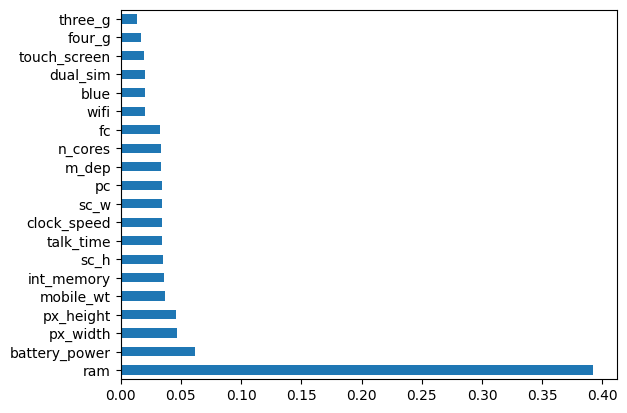

In [22]:
# Plotting Top 20 features w.r.t. the Target
imp_fea.nlargest(20).plot(kind="barh")

* Based on the graph we have observed that ram is the most important feature and from battery_power to fc the values is little bit high.
* So we are taking only the top 14 features that are having higher impact on mobile price.

In [23]:
# Creating Dataframe for the new features
new_X = train_df[list(imp_fea.nlargest(14).index)]
new_X

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,sc_h,talk_time,clock_speed,sc_w,pc,m_dep,n_cores,fc
0,2549,842,756,20,188,7,9,19,2.2,7,2,0.6,2,1
1,2631,1021,1988,905,136,53,17,7,0.5,3,6,0.7,3,0
2,2603,563,1716,1263,145,41,11,9,0.5,2,6,0.9,5,2
3,2769,615,1786,1216,131,10,16,11,2.5,8,9,0.8,6,0
4,1411,1821,1212,1208,141,44,8,15,1.2,2,14,0.6,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,668,794,1890,1222,106,2,13,19,0.5,4,14,0.8,6,0
1996,2032,1965,1965,915,187,39,11,16,2.6,10,3,0.2,4,0
1997,3057,1911,1632,868,108,36,9,5,0.9,1,3,0.7,8,1
1998,869,1512,670,336,145,46,18,19,0.9,10,5,0.1,5,4


# MODEL SELECTION

* Defining the model/algorithm

In [24]:
# Creating objects for the model
KNN_model = KNeighborsClassifier()
LR_model = LogisticRegression()
SVC_model = SVC()
RFC_model = RandomForestClassifier()
DTC_model = DecisionTreeClassifier()

#Splitting the dataset into training and validation sets

In [25]:
X_train, X_val, y_train, y_val = train_test_split(new_X, y, test_size = 0.15, random_state = 42)

In [26]:
# Length of X_train
len(X_train)

1700

In [27]:
# Length of X_val
len(X_val)

300

# Training the model

In [28]:
KNN_model.fit(X_train, y_train)
LR_model.fit(X_train, y_train)
SVC_model.fit(X_train, y_train)
RFC_model.fit(X_train, y_train)
DTC_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

# Testing phase

In [29]:
KNN = KNN_model.predict(X_val)
LR = LR_model.predict(X_val)
SVC = SVC_model.predict(X_val)
RFC = RFC_model.predict(X_val)
DTC = DTC_model.predict(X_val)

In [30]:
# Creating dataframe for the predicted values
prediction = pd.DataFrame({
    "Actual": y_val,
    "KNN": KNN,
    "LR": LR,
    "SVC": SVC,
    "DT": DTC,
    "RF": RFC
})

In [31]:
prediction

,Actual,KNN,LR,SVC,DT,RF
1860,0,0,0,0,0,0
353,2,2,2,2,2,2
1333,1,1,0,1,1,1
905,3,3,3,3,3,3
1289,1,1,1,1,1,1
...,...,...,...,...,...,...
316,1,1,0,1,0,1
45,1,1,0,1,1,1
1719,0,0,0,0,0,0
1831,1,1,0,1,1,1


# Performance

In [32]:
f'Accuracy of KNN: {accuracy_score(y_val, KNN)}'

'Accuracy of KNN: 0.9466666666666667'

In [33]:
f'Accuracy of SVC: {accuracy_score(y_val, SVC)}'

'Accuracy of SVC: 0.9666666666666667'

In [34]:
f'Accuracy of LR: {accuracy_score(y_val, LR)}'

'Accuracy of LR: 0.67'

In [35]:
f'Accuracy of DTC: {accuracy_score(y_val, DTC)}'

'Accuracy of DTC: 0.84'

In [36]:
f'Accuracy of RFC: {accuracy_score(y_val, RFC)}'

'Accuracy of RFC: 0.9133333333333333'

#HyperParameter tuining

In [37]:
arr = [i for i in range(1,50) if i%2==1]
arr

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

In [38]:
for k in arr:
  new_model = KNeighborsClassifier(n_neighbors = k)
  new_model.fit(X_train, y_train)
  pred = new_model.predict(X_val)
  print(f'The accuracy for k={k} is {accuracy_score(y_val, pred)}')

The accuracy for k=1 is 0.93
The accuracy for k=3 is 0.94
The accuracy for k=5 is 0.9466666666666667
The accuracy for k=7 is 0.96
The accuracy for k=9 is 0.96
The accuracy for k=11 is 0.9566666666666667
The accuracy for k=13 is 0.9566666666666667
The accuracy for k=15 is 0.9533333333333334
The accuracy for k=17 is 0.9466666666666667
The accuracy for k=19 is 0.9433333333333334
The accuracy for k=21 is 0.9433333333333334
The accuracy for k=23 is 0.9466666666666667
The accuracy for k=25 is 0.95
The accuracy for k=27 is 0.9566666666666667
The accuracy for k=29 is 0.9533333333333334
The accuracy for k=31 is 0.9466666666666667
The accuracy for k=33 is 0.95
The accuracy for k=35 is 0.9433333333333334
The accuracy for k=37 is 0.94
The accuracy for k=39 is 0.95
The accuracy for k=41 is 0.9566666666666667
The accuracy for k=43 is 0.9566666666666667
The accuracy for k=45 is 0.9566666666666667
The accuracy for k=47 is 0.95
The accuracy for k=49 is 0.9433333333333334


# Applying cross validation

In [39]:
# Accuracy score for setting the value of k as 1
score = cross_val_score(KNeighborsClassifier(n_neighbors=1), new_X, y, cv=10)

In [40]:
score

array([0.885, 0.91 , 0.91 , 0.905, 0.925, 0.92 , 0.905, 0.91 , 0.905,
       0.915])

In [41]:
min(score)

0.885

In [42]:
max(score)

0.925

In [43]:
score.mean()

0.909

In [44]:
# Accuracy score for setting the value of k from values of arr
for k in arr:
  scores = cross_val_score(KNeighborsClassifier(n_neighbors = k), new_X, y, cv=10)
  print(f'The accuracy for k={k} is {scores.mean()}')

The accuracy for k=1 is 0.909
The accuracy for k=3 is 0.925
The accuracy for k=5 is 0.9235000000000001
The accuracy for k=7 is 0.9265000000000001
The accuracy for k=9 is 0.9280000000000002
The accuracy for k=11 is 0.9335000000000001
The accuracy for k=13 is 0.9309999999999998
The accuracy for k=15 is 0.9315000000000001
The accuracy for k=17 is 0.9315000000000001
The accuracy for k=19 is 0.932
The accuracy for k=21 is 0.9340000000000002
The accuracy for k=23 is 0.9315000000000001
The accuracy for k=25 is 0.9294999999999998
The accuracy for k=27 is 0.931
The accuracy for k=29 is 0.931
The accuracy for k=31 is 0.9305
The accuracy for k=33 is 0.9295000000000002
The accuracy for k=35 is 0.9295
The accuracy for k=37 is 0.9269999999999999
The accuracy for k=39 is 0.929
The accuracy for k=41 is 0.9259999999999999
The accuracy for k=43 is 0.9275
The accuracy for k=45 is 0.9285
The accuracy for k=47 is 0.9259999999999999
The accuracy for k=49 is 0.9265000000000001


* On the basis of accuracy score you can select the value for k.

# Prediction on the testing dataset

In [45]:
# Testing dataframe
test_df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


* Selecting those 14 important features which we have use for model training.

In [46]:
test_X = test_df[list(imp_fea.nlargest(14).index)]

In [47]:
test_X

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,sc_h,talk_time,clock_speed,sc_w,pc,m_dep,n_cores,fc
0,3476,1043,1412,226,193,5,12,2,1.8,7,16,0.1,3,14
1,3895,841,857,746,191,61,6,7,0.5,0,12,0.8,5,4
2,2396,1807,1366,1270,186,27,17,10,2.8,10,4,0.9,3,1
3,3893,1546,1752,295,96,25,10,7,0.5,0,20,0.5,8,18
4,1773,1434,810,749,108,49,15,7,1.4,8,18,0.5,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2121,1700,913,644,170,54,14,15,1.9,8,17,0.5,7,0
996,1933,609,1632,1152,186,13,8,19,1.8,1,2,0.9,4,0
997,1223,1185,825,477,80,8,5,14,1.4,0,12,0.5,1,1
998,2509,1533,832,38,171,50,15,6,0.5,11,12,0.4,2,0


In [48]:
# Making prediction
test_pred_KNN = KNN_model.predict(test_X)
test_pred_LR = LR_model.predict(test_X)
test_pred_SVC = SVC_model.predict(test_X)
test_pred_RFC = RFC_model.predict(test_X)
test_pred_DTC = DTC_model.predict(test_X)

In [49]:
# Creating dataframe for predicted values
test_data_prediction = pd.DataFrame({'KNN':test_pred_KNN,
                                     'LR':test_pred_LR,
                                     'SVC':test_pred_SVC,
                                     'RFC':test_pred_RFC,
                                     'DTC':test_pred_DTC})

* Prediction of the mobile price range based on different models.

In [50]:
test_data_prediction

,KNN,LR,SVC,RFC,DTC
0,3,2,3,2,3
1,3,3,3,3,3
2,3,2,2,2,2
3,3,3,3,3,3
4,1,2,1,1,1
...,...,...,...,...,...
995,2,1,2,2,2
996,1,1,1,1,1
997,0,2,0,0,1
998,2,1,2,2,2
